<a href="https://colab.research.google.com/github/Anybody99901/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:

from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv


This cell allows you to upload a file from your device to Google Colab. We're uploading the Titanic dataset CSV file to begin our analysis.

In [19]:

import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset (2).csv']))

We're importing the pandas library and using it to load the uploaded CSV file into a DataFrame called df, which is a table-like structure perfect for analysis.

In [20]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This shows the first 5 rows of the dataset to help us understand the structure, column names, and sample data.

In [21]:

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


This code helps us identify missing values in each column, which is a crucial first step in data cleaning.

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Displays the data types of each column and the number of non-null (non-missing) values. Useful for understanding what kind of data we are working with (e.g., integers, floats, strings).

In [23]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Gives statistical summaries of all numeric columns — such as mean, standard deviation, min/max, and quartiles — which help us understand distributions.

In [24]:

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

These columns may not provide significant value in the initial analysis, so we drop them to simplify our dataset.

In [25]:

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-25-410e0d28aecf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-25-410e0d28aecf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


We fill missing Age values with the median.
We fill missing Embarked values with the most frequent (mode) value.

This makes the dataset clean and usable for EDA.

In [26]:

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


Convert Sex from text to numbers: male = 0, female = 1.



Use one-hot encoding for the Embarked column to convert categories into separate binary columns for modeling.

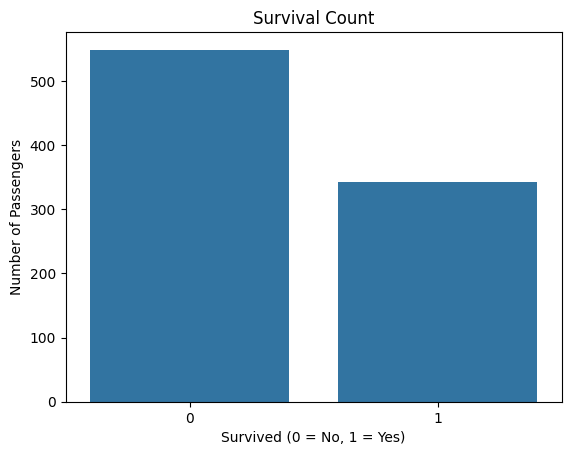

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()

This bar plot shows how many passengers survived (1) and how many did not (0). It helps visualize the class imbalance, if any.

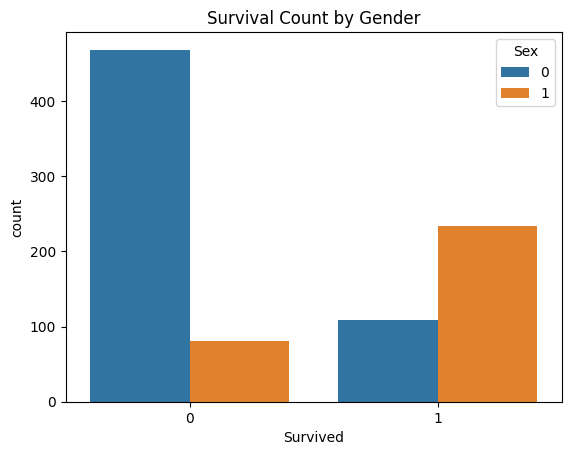

In [28]:

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

This plot shows the survival distribution between male and female passengers. It helps identify if gender played a role in survival.

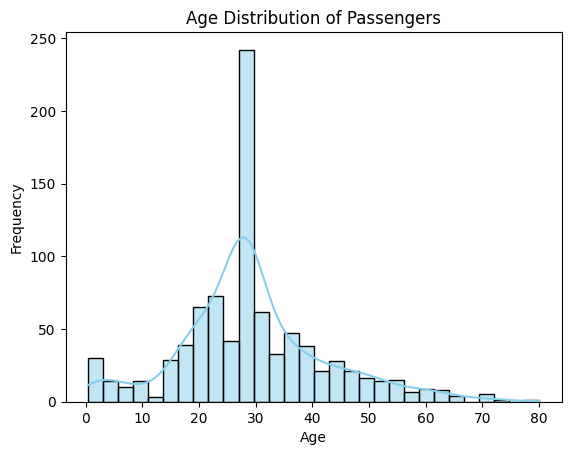

In [29]:

sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram with a density curve shows how the ages are distributed in the dataset.

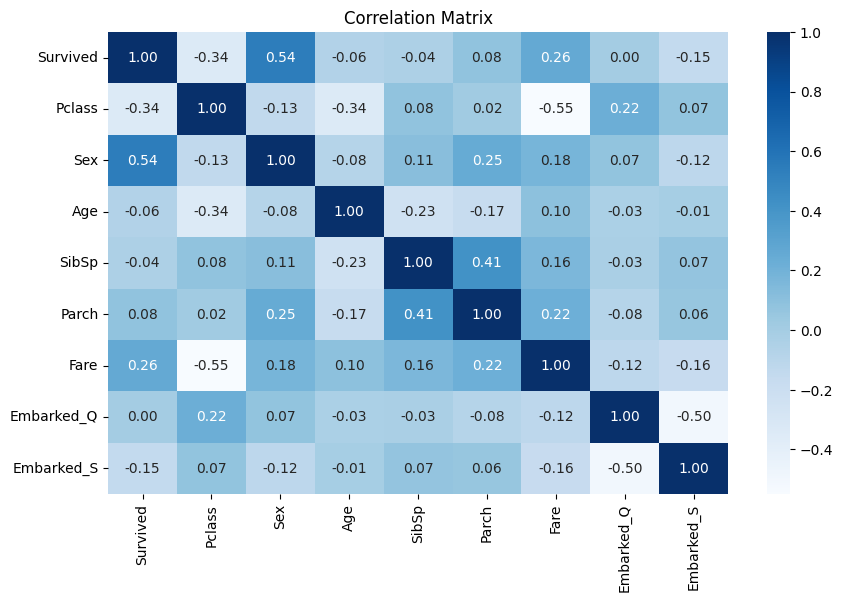

In [31]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The heatmap shows correlations between numeric variables. A high positive or negative value indicates strong relationships. Useful for feature selection.

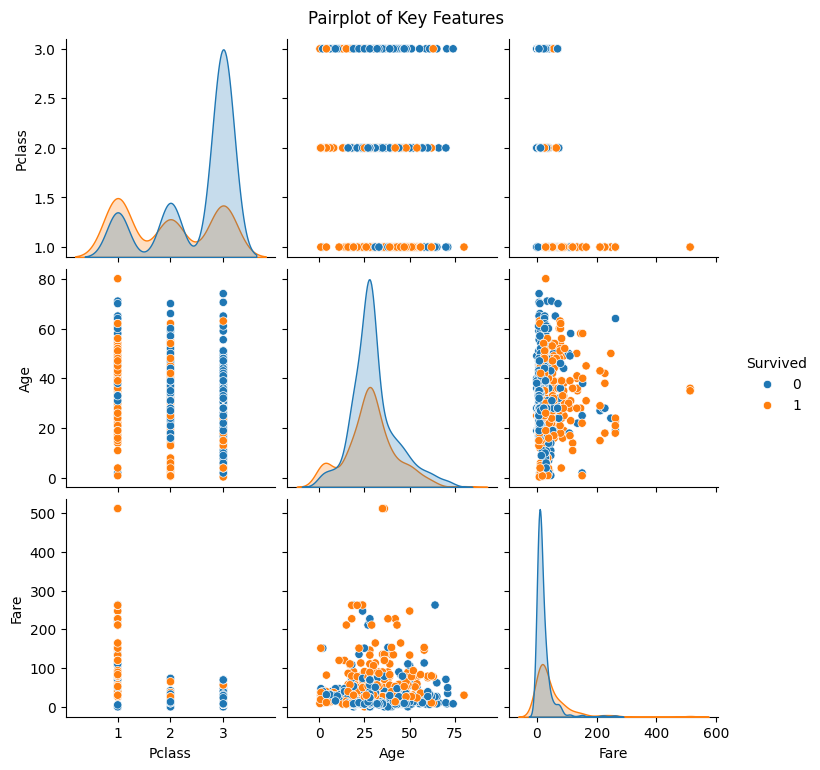

In [32]:

sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

This multi-plot grid shows relationships between features like class, age, and fare, color-coded by survival status.